## Obtaining the Efficient Frontier - Part III

*Suggested Answers follow (usually there are multiple ways to solve a problem in Python).*

Ok, let’s continue the exercise from the last lecture.

In [14]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

assets = ['WMT', 'META']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = yf.download(a, start='2014-01-01', auto_adjust=False)['Adj Close']


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


tính toán Lợi nhuận và Độ biến động (Rủi ro) của danh mục đầu tư dựa trên các trọng số ($w$) đã cho.

| Thống kê           | Công thức tài chính                                                                 | Mã code Python |
|-------------------|-----------------------------------------------------------------------------------|----------------|
| Lợi nhuận kỳ vọng  | $\text{Lợi nhuận} = \sum (\text{Trọng số} \times \text{Lợi nhuận trung bình}) \times 250$ | `np.sum(weights * log_returns.mean()) * 250` |
| Phương sai kỳ vọng | $\text{Phương sai} = w^T \Sigma w$, với $\Sigma$ là ma trận hiệp phương sai       | `np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))` |
| Độ biến động kỳ vọng | $\text{Độ biến động} = \sqrt{\text{Phương sai}}$                                | `np.sqrt(...)` |



In [15]:
log_returns = np.log(pf_data / pf_data.shift(1))

num_assets = len(assets)

weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.74953983, 0.25046017])

Now, estimate the expected Portfolio Return, Variance, and Volatility.

Expected Portfolio Return:

In [16]:
np.sum(weights * log_returns.mean()) * 250

np.float64(0.1513364184377373)

Expected Portfolio Variance:

In [17]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

np.float64(0.039311009190087336)

Expected Portfolio Volatility:

In [18]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

np.float64(0.19827004108056098)

***

The rest of this exercise will be a reproduction of what we did in the previous video.

1)	Create two empty lists. Name them pf_returns and pf_volatilites.

In [19]:
pf_returns = []
pf_volatilities = []

2)	Create a loop with 1,000 iterations that will generate random weights, summing to 1, and will append the obtained values for the portfolio returns and the portfolio volatilities to pf_returns and pf_volatilities, respectively.

In [20]:
for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pf_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pf_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))

pf_returns, pf_volatilities

([np.float64(0.16842258140148017),
  np.float64(0.15870341773961022),
  np.float64(0.1467528606912226),
  np.float64(0.18642620801382348),
  np.float64(0.18178686508867464),
  np.float64(0.17368961433044341),
  np.float64(0.1515421059572091),
  np.float64(0.19407066206608245),
  np.float64(0.16709988044567484),
  np.float64(0.1729994118278885),
  np.float64(0.19581050175747872),
  np.float64(0.1660826466386321),
  np.float64(0.15311548492597749),
  np.float64(0.16048461563311112),
  np.float64(0.13563151932476958),
  np.float64(0.18108419442050888),
  np.float64(0.1427325426653402),
  np.float64(0.17139072391123453),
  np.float64(0.13610140347786892),
  np.float64(0.17082510822963373),
  np.float64(0.14092010018227596),
  np.float64(0.18827747220491373),
  np.float64(0.1734529458564953),
  np.float64(0.18260877240462509),
  np.float64(0.1798398460221087),
  np.float64(0.16161945333336655),
  np.float64(0.16445362451047796),
  np.float64(0.20171870238164213),
  np.float64(0.137099474254

3)	Transform the obtained lists into NumPy arrays and reassign them to pf_returns and pf_volatilites. Once you have done that, the two objects will be NumPy arrays.

In [21]:
pf_returns = np.array(pf_returns)
pf_volatilities = np.array(pf_volatilities)

pf_returns, pf_volatilities

(array([0.16842258, 0.15870342, 0.14675286, 0.18642621, 0.18178687,
        0.17368961, 0.15154211, 0.19407066, 0.16709988, 0.17299941,
        0.1958105 , 0.16608265, 0.15311548, 0.16048462, 0.13563152,
        0.18108419, 0.14273254, 0.17139072, 0.1361014 , 0.17082511,
        0.1409201 , 0.18827747, 0.17345295, 0.18260877, 0.17983985,
        0.16161945, 0.16445362, 0.2017187 , 0.13709947, 0.17278198,
        0.16288905, 0.17799463, 0.19928995, 0.17594852, 0.15505237,
        0.15560615, 0.15903191, 0.20385613, 0.1377661 , 0.18498382,
        0.17257853, 0.1780164 , 0.17127018, 0.16428157, 0.18224241,
        0.1542466 , 0.1505832 , 0.15632019, 0.20054865, 0.16760886,
        0.16926617, 0.16902745, 0.18207604, 0.1754221 , 0.18099827,
        0.18174521, 0.16951904, 0.13692269, 0.17638805, 0.19760617,
        0.16712252, 0.17396379, 0.17000059, 0.17264591, 0.17665188,
        0.15928777, 0.16044785, 0.15914537, 0.18446027, 0.16690669,
        0.158655  , 0.17188058, 0.15226576, 0.15

Now, create a dictionary, called portfolios, whose keys are the strings “Return” and “Volatility” and whose values are the NumPy arrays pf_returns and pf_volatilities.

In [22]:
portfolios = pd.DataFrame({'Return': pf_returns, 'Volatility': pf_volatilities})

In [23]:
portfolios.head()

,Return,Volatility
0,0.168423,0.231500
1,0.158703,0.208062
2,0.146753,0.196221
3,0.186426,0.296424
4,0.181787,0.277755


Finally, plot the data from the portfolios dictionary on a graph. Let the x-axis represent the volatility data from the portfolios dictionary and the y-axis – the data about rates of return. <br />
Organize your chart well and make sure you have labeled both the x- and the y- axes.

Text(0, 0.5, 'Expected Return')

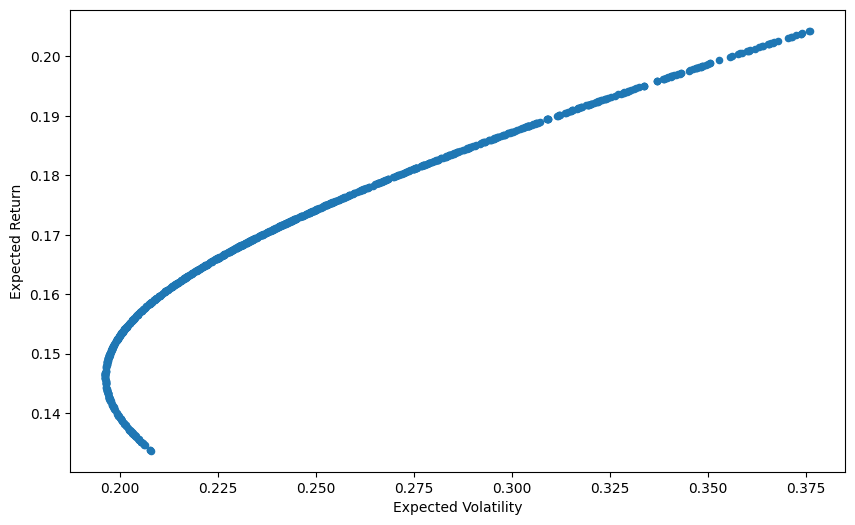

In [24]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

1. Các Trục và Điểm Dữ liệu
| Trục / Yếu tố        | Ý nghĩa |
|---------------------|---------|
| Trục X (Expected Volatility - Độ biến động Kỳ vọng) | Đại diện cho rủi ro của danh mục đầu tư, được đo bằng độ lệch chuẩn hàng năm của lợi suất. |
| Trục Y (Expected Return - Lợi nhuận Kỳ vọng) | Đại diện cho lợi nhuận trung bình hàng năm được dự kiến từ danh mục đầu tư. |
| Các Điểm Dữ liệu | Mỗi điểm là một danh mục đầu tư được tạo ra bằng cách gán một tổ hợp trọng số (weights) ngẫu nhiên khác nhau cho các tài sản. |

2. Phân tích Đường Biên giới Hiệu quả
| Phần | Vị trí / Mô tả | Ý nghĩa |
|------|----------------|---------|
| Biên giới Hiệu quả (Efficient Frontier) | Đường cong phía trên, lồi ra ngoài cùng bên trái | Thể hiện các danh mục đầu tư mang lại lợi nhuận cao nhất cho một mức rủi ro nhất định. Bất kỳ danh mục nào nằm dưới đường này là không hiệu quả. |
| Danh mục Rủi ro Tối thiểu (Minimum Volatility Portfolio) | Điểm ngoài cùng bên trái của biểu đồ | Đây là danh mục có sự kết hợp trọng số mang lại mức rủi ro thấp nhất. Ví dụ: độ biến động ~0.196, lợi nhuận kỳ vọng ~0.14. |
| Danh mục Lợi nhuận Tối đa (Maximum Return Portfolio) | Điểm ngoài cùng bên phải và trên cùng của đường cong | Danh mục tập trung vào tài sản có lợi nhuận kỳ vọng cao nhất (ví dụ cổ phiếu META), đi kèm với mức rủi ro cao nhất. |

3. Kết luận về Danh mục đầu tư
| Ý tưởng | Giải thích |
|---------|------------|
| Đánh đổi Rủi ro – Lợi nhuận | Biểu đồ minh họa rằng để có lợi nhuận cao hơn, nhà đầu tư phải chấp nhận rủi ro cao hơn. |
| Đa dạng hóa | Sự tồn tại của Biên giới Hiệu quả cho thấy bằng cách kết hợp các tài sản khác nhau, có thể

******

What do you think would happen if you re-created the Markowitz Efficient Frontier for 3 stocks? The code you have created is supposed to accommodate easily the addition of a third stock, say British Petroleum (‘BP’). Insert it in your data and re-run the code (you can expand the “Cell” list from the Jupyter menu and click on “Run All” to execute all the cells at once!). <br />

How would you interpret the obtained graph?


In [25]:


assets = ['WMT', 'META','BP']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = yf.download(a, start='2014-01-01', auto_adjust=False)['Adj Close']


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [26]:
pf_data.head()

,WMT,META,BP
Date,,,
2014-01-02,20.850988,54.374798,24.222155
2014-01-03,20.782286,54.225719,24.166620
2014-01-06,20.666023,56.849541,24.232250
2014-01-07,20.729441,57.565128,24.509909
2014-01-08,20.565605,57.873226,24.600779


In [27]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [28]:
num_assets = len(assets)
num_assets

3

In [29]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.30153185, 0.18144296, 0.51702519])

In [30]:
weights[0] + weights[1] + weights[2]

np.float64(1.0)

Expected Portfolio Return:

In [31]:
np.sum(weights * log_returns.mean()) * 250

np.float64(0.09524294370969982)

Expected Portfolio Variance:

In [32]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

np.float64(0.04229836496276074)

Expected Portfolio Volatility:

In [33]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

np.float64(0.2056656630620696)

*****

In [34]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))

pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.09168127, 0.11222984, 0.13544765, 0.1336497 , 0.11785346,
        0.10592597, 0.13031451, 0.12747776, 0.11655542, 0.1156533 ,
        0.08701882, 0.13209814, 0.14863447, 0.15324933, 0.13971414,
        0.15842089, 0.08245107, 0.12463415, 0.09622401, 0.11771079,
        0.09511299, 0.1489159 , 0.11736997, 0.12137722, 0.12480628,
        0.16065467, 0.13316816, 0.1147626 , 0.14487132, 0.1284732 ,
        0.12941664, 0.15207001, 0.1142817 , 0.11453308, 0.10131294,
        0.14636261, 0.14196524, 0.11220383, 0.08890226, 0.12229597,
        0.07484082, 0.08519033, 0.12810914, 0.13873244, 0.1451681 ,
        0.0852097 , 0.16234714, 0.14637194, 0.14422674, 0.17255406,
        0.11595031, 0.09566834, 0.16504869, 0.12393555, 0.13364001,
        0.04038954, 0.11669219, 0.16742677, 0.12265192, 0.13897441,
        0.14248856, 0.1078606 , 0.14683053, 0.1509594 , 0.15275228,
        0.11471272, 0.09342583, 0.13150325, 0.14722839, 0.10645398,
        0.13232119, 0.13299885, 0.07414638, 0.11

In [35]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

Text(0, 0.5, 'Expected Return')

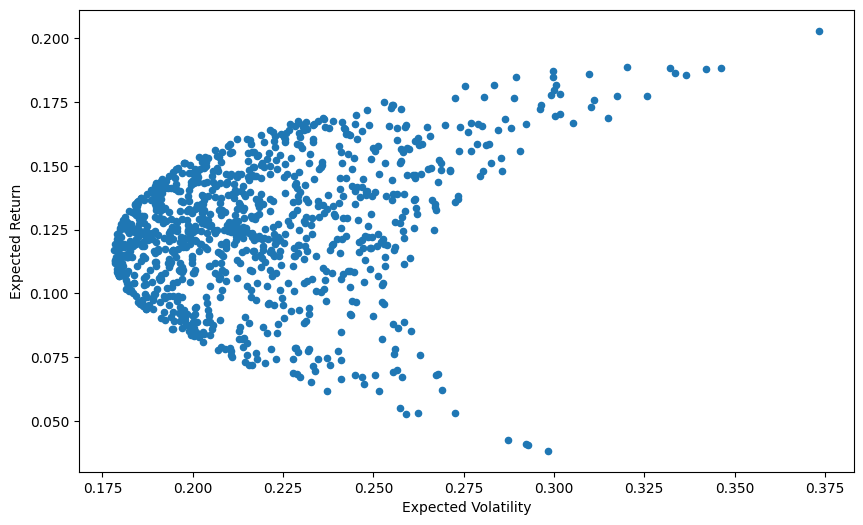

In [36]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

1. Phân tích Biểu đồ Ba Cổ phiếu (WMT, META, BP)

| Khái niệm                  | Vị trí và Giá trị Ước tính                     | Ý nghĩa |
|-----------------------------|-----------------------------------------------|---------|
| Trục X (Expected Volatility - Độ biến động) | Khoảng từ ≈ 0.175 đến ≈ 0.375 | Đại diện cho rủi ro của danh mục đầu tư. |
| Trục Y (Expected Return - Lợi nhuận)       | Khoảng từ ≈ 0.04 đến ≈ 0.20   | Đại diện cho lợi nhuận kỳ vọng của danh mục đầu tư. |
| Tập hợp Khả thi              | Toàn bộ đám mây điểm                          | Toàn bộ các tổ hợp rủi ro/lợi nhuận có thể đạt được bằng cách phân bổ vốn giữa WMT, META, và BP. |
| Danh mục Rủi ro Tối thiểu    | Điểm ngoài cùng bên trái. Độ biến động thấp nhất ~0.178 | Đây là danh mục đầu tư có rủi ro thấp nhất trong tập hợp khả thi. |
| Danh mục Lợi nhuận Tối đa    | Điểm ngoài cùng bên phải và trên cùng. Lợi nhuận kỳ vọng cao nhất ≈ 0.20 | Đây là danh mục tập trung vào tài sản có lợi nhuận kỳ vọng cao nhất, đi kèm với rủi ro cao nhất. |

2. So sánh và Tác động của Đa dạng hóa.


So với biểu đồ hai cổ phiếu trước đó (WMT, META), biểu đồ ba cổ phiếu này thể hiện rõ lợi ích của việc đa dạng hóa:

Giảm Rủi ro Tối thiểu (Minimum Volatility): Điểm rủi ro tối thiểu đã dịch chuyển đáng kể sang bên trái.

* 2 Cổ phiếu (WMT, META): Độ biến động tối thiểu ≈0.196.

* 3 Cổ phiếu (WMT, META, BP): Độ biến động tối thiểu ≈0.178.

* Kết luận: Với việc thêm BP (một cổ phiếu có tương quan thấp hơn), danh mục đầu tư có thể đạt được rủi ro thấp hơn khoảng 10% (
0.196
0.196−0.178
​
 ≈9.2%) so với trước đây, đây là một cải thiện đáng kể về mặt hiệu quả.

Mở rộng Tập hợp Khả thi: Đám mây điểm trở nên rộng hơn và lồi hơn về phía trên bên trái (left and up).

* Sự lồi ra này chứng minh rằng đối với cùng một mức lợi nhuận, nhà đầu tư có thể đạt được rủi ro thấp hơn so với danh mục hai cổ phiếu. Đây là nguyên tắc cơ bản của Lý thuyết Markowitz.

Đánh đổi Rủi ro - Lợi nhuận: Biên giới Hiệu quả (đường cong tối ưu) nằm phía trên và bên trái của tập hợp khả thi hai cổ phiếu, cung cấp cho nhà đầu tư một tập hợp cơ hội tốt hơn để lựa chọn danh mục đầu tư phù hợp với khẩu vị rủi ro của họ.